# 图片分割

In [1]:
'''
import numpy as np
import os
import torchvision
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import T_co


class MyData(Dataset):
    def __init__(self, filepath, transform=None):
        self.transform = transform
        self.root_path = filepath
        self.file_path = os.listdir(self.root_path)

    def __getitem__(self, index) -> T_co:
        temp = Image.open(os.path.join(self.root_path, self.file_path[index])).convert("RGB")
        x = np.asarray(temp.crop((1, 1, 102, 56))).transpose(2, 0, 1)
        x = torch.tensor(x / 255)
        y = self.file_path[index]
        return x, y

    def __len__(self):
        return len(self.file_path)


mydata = MyData("../Attachment1")
data = DataLoader(mydata, batch_size=10, drop_last=False)

for i in data:
    x, y = i
    for j in range(len(i[0])):
        print(j)
        torchvision.utils.save_image(x[j], os.path.join("..\label\\", str(y[j])))
'''

'\nimport numpy as np\nimport os\nimport torchvision\nimport torch\nfrom PIL import Image\nfrom torch.utils.data import Dataset, DataLoader\nfrom torch.utils.data.dataset import T_co\n\n\nclass MyData(Dataset):\n    def __init__(self, filepath, transform=None):\n        self.transform = transform\n        self.root_path = filepath\n        self.file_path = os.listdir(self.root_path)\n\n    def __getitem__(self, index) -> T_co:\n        temp = Image.open(os.path.join(self.root_path, self.file_path[index])).convert("RGB")\n        x = np.asarray(temp.crop((1, 1, 102, 56))).transpose(2, 0, 1)\n        x = torch.tensor(x / 255)\n        y = self.file_path[index]\n        return x, y\n\n    def __len__(self):\n        return len(self.file_path)\n\n\nmydata = MyData("../Attachment1")\ndata = DataLoader(mydata, batch_size=10, drop_last=False)\n\nfor i in data:\n    x, y = i\n    for j in range(len(i[0])):\n        print(j)\n        torchvision.utils.save_image(x[j], os.path.join("..\\label\\"

# 文字识别并保存

In [2]:
'''
!pip install paddlepaddle==2.3.2
!pip install "paddleocr>=2.0.1"

from paddleocr import PaddleOCR, draw_ocr
from glob import glob
import pandas as pandas_my
from tqdm import tqdm
from PIL import Image
import torchvision
import zipfile
import os
import cv2

ocr = PaddleOCR(use_angle_cls=False, lang="ch")
image_path = glob('/kaggle/input/apcmc/label/label/*')
data=pandas_my.read_excel('/kaggle/input/apcmc/Attachment 2.xlsx')

!mkdir /kaggle/working/result
for i in tqdm(range(len(image_path))):
    path = image_path[i]
    result = ocr.ocr(path)
    
    data1=int(result[0][0][1][0][1:-1])
    data2=result[0][1][1][0][3:9]
    data3=result[0][2][1][0][3:9]
    
    if(not data2[-1].isdigit()):
        data2=data2[:-1]
        if(not data2[-1].isdigit()):data2=int(data2[:-1])
    if(not data2[0].isdigit()):
        data2=data2[1:]
        if(not data2[0].isdigit()):data2=int(data2[1:]) 
    data2=int(data2)

        
    if(not data3[-1].isdigit()):
        data3=data3[:-1]
        if(not data3[-1].isdigit()):data3=int(data3[:-1])
    if(not data3[0].isdigit()):
        data3=data3[1:]
        if(not data3[0].isdigit()):data3=int(data3[1:])
    data3=int(data3)
              
    data.iloc[data1-110,1:4]= pandas_my.DataFrame([data1,data2,data3],index=data.columns[1:4]).T
    
    result = result[0]
    image = Image.open(path).convert('RGB')
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    scores = [line[1][1] for line in result]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='/kaggle/input/stkaiti/STKAITI.TTF')
    cv2.imwrite('/kaggle/working/result/%s.jpg'%data1,im_show)
    
data.astype(int).to_excel('./Attachment 2.xlsx',index=False)

dir_name = '/kaggle/working/result'
zip_file = dir_name+'.zip'
                                         
zip = zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED)
for item in os.listdir(dir_name):
    zip.write(dir_name+os.sep+item)
zip.close()
'''

'\n!pip install paddlepaddle==2.3.2\n!pip install "paddleocr>=2.0.1"\n\nfrom paddleocr import PaddleOCR, draw_ocr\nfrom glob import glob\nimport pandas as pandas_my\nfrom tqdm import tqdm\nfrom PIL import Image\nimport torchvision\nimport zipfile\nimport os\nimport cv2\n\nocr = PaddleOCR(use_angle_cls=False, lang="ch")\nimage_path = glob(\'/kaggle/input/apcmc/label/label/*\')\ndata=pandas_my.read_excel(\'/kaggle/input/apcmc/Attachment 2.xlsx\')\n\n!mkdir /kaggle/working/result\nfor i in tqdm(range(len(image_path))):\n    path = image_path[i]\n    result = ocr.ocr(path)\n    \n    data1=int(result[0][0][1][0][1:-1])\n    data2=result[0][1][1][0][3:9]\n    data3=result[0][2][1][0][3:9]\n    \n    if(not data2[-1].isdigit()):\n        data2=data2[:-1]\n        if(not data2[-1].isdigit()):data2=int(data2[:-1])\n    if(not data2[0].isdigit()):\n        data2=data2[1:]\n        if(not data2[0].isdigit()):data2=int(data2[1:]) \n    data2=int(data2)\n\n        \n    if(not data3[-1].isdigit())

# 预测温度一

In [2]:
import torch
from matplotlib import pyplot as plt
from math import ceil

#画损失函数图
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.savefig("/kaggle/working/loss.jpg")
    plt.show()


#画出每一个batchsize中的图片
def plot_image(img,label,pred=None):
    fig = plt.figure()
    for i in range(len(img)):
        plt.subplot(ceil(len(img)**0.5), ceil(len(img)**0.5), i + 1)
        plt.tight_layout()
        plt.imshow(img[i].transpose(0,1).transpose(1,2))
        if(pred is not None):plt.title("true:{} predict:{}".format(label[i].item(),pred[i].item()))
        else:plt.title("{} D.C.".format(label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

def one_hot(label, depth):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

In [3]:
import os
from glob import glob
from torchvision import transforms as tr
from torch.utils.data import DataLoader,Dataset
from PIL import Image


#加载本地数据的类
class LocalDataset(Dataset):
    def __init__(self, data_list, label,transform=None):
        self.transform = transform
        self.x = data_list
        self.label = label

    def __getitem__(self, index):
        img = Image.open(self.x[index]).convert('RGB')
        if self.transform is not None:img = self.transform(img)
        return img[:,15:,:],torch.tensor(self.label.iloc[int(self.x[index][-8:-4])-110,[2]])

    def __len__(self):
        return len(self.x)



#加载本地的数据集
def local_datasets(data_path,label,bt,PM,NM=0):
    numclass_path = glob(os.path.join(data_path, '*'))

    data_transform = {"train": tr.Compose([
        tr.Resize((329,428)),
        tr.ToTensor()])}

    train_dataset = LocalDataset(numclass_path,label,transform=data_transform["train"])
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=bt, shuffle=False,num_workers=NM,pin_memory=PM)

    return train_loader


In [22]:
import pandas as pd
label = pd.read_excel("/kaggle/input/apcmc/Attachment 2.xlsx")
train_loader= local_datasets('/kaggle/input/apcmc/Attachment 1/Attachment 1',label,1,True)

#查看图片和标签
# x, y, idx = next(iter(train_loader))
# print(x.shape,y.shape)
# plot_image(x, y)

In [9]:
import torch.nn as nn
from torchvision import transforms, datasets
import json
import torch.optim as optim
import time
from torch.optim import lr_scheduler
import torchvision.models as models

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

resnet18_regress = models.resnet18(pretrained=False)
resnet18_regress.fc=torch.nn.Linear(in_features=512, out_features=1, bias=True)

net=resnet18_regress.to(device)
# net = torch.load("/kaggle/working/Net1_961.6232820264995.pth",map_location=device)

less_valloss = 10000.0
loss_function = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.000001,weight_decay=0.0001)
scheduler = lr_scheduler.StepLR(optimizer,step_size=2,gamma = 0.9)


data=[]
for epoch in range(100): 
    #break
    train_loss = 0.0
    net.train()
    for step1,(x,label) in enumerate(train_loader):  
        optimizer.zero_grad()
        outputs = net(x.to(torch.float32).to(device))
        loss = loss_function(outputs, label.to(torch.float32).to(device))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    data.append(train_loss)
      
    scheduler.step()
    print('epoch:',epoch+1,'train_loss:',train_loss)            
    torch.save(net, './Net1_%s.pth'%train_loss)

    if (train_loss<= 1 ):break

epoch: 1 train_loss: 1019.4292131029069
epoch: 2 train_loss: 1018.9880751743913
epoch: 3 train_loss: 1006.8601776324213
epoch: 4 train_loss: 990.1599688865244
epoch: 5 train_loss: 974.6992239616811
epoch: 6 train_loss: 958.4544965997338
epoch: 7 train_loss: 941.0741571597755
epoch: 8 train_loss: 924.6403279080987
epoch: 9 train_loss: 906.1724201664329
epoch: 10 train_loss: 890.959605537355
epoch: 11 train_loss: 871.487142175436
epoch: 12 train_loss: 857.8461731299758
epoch: 13 train_loss: 838.7398174256086
epoch: 14 train_loss: 826.4228598624468
epoch: 15 train_loss: 807.9006492830813
epoch: 16 train_loss: 797.1346389725804
epoch: 17 train_loss: 779.765204500407
epoch: 18 train_loss: 770.3095326088369
epoch: 19 train_loss: 754.228308826685
epoch: 20 train_loss: 745.9076154008508
epoch: 21 train_loss: 730.8880098387599
epoch: 22 train_loss: 723.5288174860179
epoch: 23 train_loss: 709.9895545877516
epoch: 24 train_loss: 703.478925999254
epoch: 25 train_loss: 691.1368483603001
epoch: 26 t

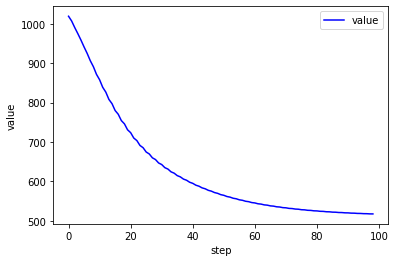

In [10]:
plot_curve(data[1:])

# 查看预测效果

In [35]:
#画出每一个batchsize中的图片
def plot_image(img,label,idx,pred=None):
#     pred = torch.tensor(round(pred.item(), 3))
    fig = plt.figure()
    for i in range(len(img)):
        plt.subplot(ceil(len(img)**0.5), ceil(len(img)**0.5), i + 1)
        plt.tight_layout()
        plt.imshow(img[i].transpose(0,1).transpose(1,2))
        if(pred is not None):plt.title("time:{}, true:{}, predict:{}".format(idx.item(),label[i].item(),round(pred[i].item(), 3)))
        else:plt.title("{} D.C.".format(label[i].item()))
        plt.xticks([])
        plt.yticks([])
        plt.savefig('/kaggle/working/{}.jpg'.format(idx.item()))
    plt.show()

In [18]:
import os
from glob import glob
from torchvision import transforms as tr
from torch.utils.data import DataLoader,Dataset
from PIL import Image


#加载本地数据的类
class LocalDataset(Dataset):
    def __init__(self, data_list, label,transform=None):
        self.transform = transform
        self.x = data_list
        self.label = label

    def __getitem__(self, index):
        img = Image.open(self.x[index]).convert('RGB')
        if self.transform is not None:img = self.transform(img)
        return img[:,15:,:],torch.tensor(self.label.iloc[int(self.x[index][-8:-4])-110,[2]]),int(self.x[index][-8:-4])

    def __len__(self):
        return len(self.x)



#加载本地的数据集
def local_datasets(data_path,label,bt,PM,NM=0):
    numclass_path = glob(os.path.join(data_path, '*'))

    data_transform = {"train": tr.Compose([
        tr.Resize((329,428)),
        tr.ToTensor()])}

    train_dataset = LocalDataset(numclass_path,label,transform=data_transform["train"])
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=bt, shuffle=False,num_workers=NM,pin_memory=PM)

    return train_loader

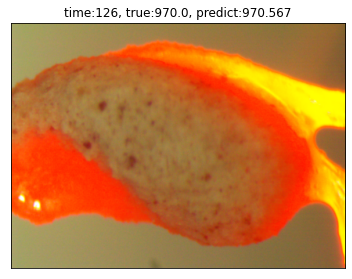

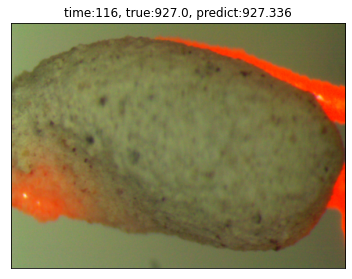

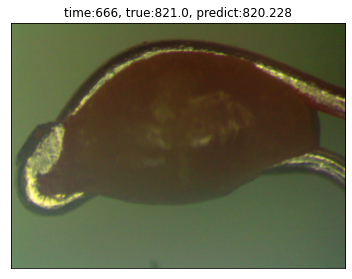

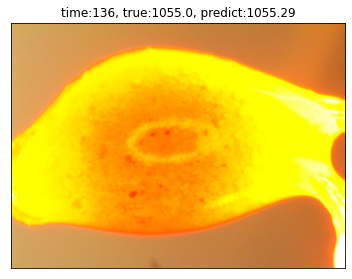

In [37]:
for step1,(x,y,idx) in enumerate(train_loader):
    if idx.item() == 116 or idx.item() == 126 or idx.item() == 136 or idx.item() == 666:
        plot_image(x, y,idx,net(x.to(device)))